## PG Diploma - Machine Learning and Artificial Intelligence

# Spark Funds Investment Analysis Assignment - Solution
##### By: Prateek Ralhan 

Let us start by stating the objectives which we need to accomplish for this assignment!!

## Objectives:
We work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

#### Spark Funds has two minor constraints for investments:

- It wants to invest between 5 to 15 million USD per round of investment

- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.


In [1]:
#Let us import the neccessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
#Loading the companies.txt and rounds2.csv files into dataframes df1 and df2 respectively:
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")

In [3]:
import pandas_profiling
companies.profile_report(style={'full_width':True})


/home/vibertron/environments/venv/lib/python3.5/site-packages/pandas_profiling/__init__.py:53: UserWarning: Sorting is supported from Python 3.6+
  warnings.warn("Sorting is supported from Python 3.6+")


# Checkpoint 1. Data Cleaning

### Lets try to explore and understand data :)

In [10]:
#Let us begin with companies.txt file
print(companies.shape,"\n")
companies.info()

(66368, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [11]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Yepzon,Karma,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [17]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [18]:
# Lets determine the total no. of unique company names
print(len(companies.name.unique()))

66103


In [19]:
print(len(companies.permalink.unique()))

66368


## Inference: 
#### We observe that the companies.txt comprises of 66368 rows with 10 attributes/columns. By having a look at it, we can see that the permalink attribute is unique for each company and the no. of unique companies is less than the no. of unique permalinks.

In [20]:
#Let us have a look at the rounds2.csv file
print(rounds2.shape,"\n")
rounds2.info()

(114949, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [21]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [22]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [23]:
print(len(rounds2.company_permalink.unique()))

90247


## Inference: 
#### We see that the rounds2.csv comprises of 114949 rows with 6 attributes/columns. By having a look at the it, we can see that the company_permalink attribute is unique for this database.

In [24]:
#It is observed that the company_permalink is case sensitive in the rounds2.csv.
#Let us normalize it and get the unique count for the same.
print(len(rounds2['company_permalink'].str.lower().unique()))

66370


##### Let us  view rows with the same company name. As a sanity check, this step is carried out to ensure that the number of unique company names is less than the number of unique permalinks .



In [25]:
pd.concat(names for _, names in companies.groupby("name") if len(names) > 1)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
281,/Organization/3Divaz-2,3DIVAZ,http://www.3divaz.ch/Home,NaN,closed,NaN,NaN,NaN,NaN,01-07-2014
282,/Organization/3Divaz-3,3DIVAZ,http://www.3divaz.ch/Home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
3942,/Organization/Aps,APS,http://www.aps.com,Clean Technology,operating,NaN,NaN,NaN,NaN,NaN
3943,/Organization/Aps-Llc,APS,NaN,Real Estate,operating,USA,GA,Macon,Griffin,31-03-2011
3982,/Organization/Apx,APX,http://www.apxgroup.com,Clean Technology,operating,NLD,7,Amsterdam,Amsterdam,01-01-1999
3983,/Organization/Apx-2,APX,http://www.apx.com/,Energy Management|Environmental Innovation,operating,USA,CA,SF Bay Area,San Jose,NaN
1526,/Organization/Adtena,Adtena,http://adtena.com/,Ad Targeting|Advertising|Mobile Advertising,operating,NaN,NaN,NaN,NaN,NaN
1527,/Organization/Adtena-2,Adtena,http://adtena.com,NaN,closed,NaN,NaN,NaN,NaN,15-11-2014
1995,/Organization/Agora-3,Agora,http://www.agora.io/,Mobile|Mobile Software Tools|VoIP,operating,USA,CA,SF Bay Area,Palo Alto,01-01-2014
1996,/Organization/Agora-6,Agora,https://www.agora.co,Android|Apps|Internet|Mobile,operating,USA,NY,New York City,New York,01-07-2013


##### We can clearly see that the same company exists under different category and/or country.
##### But since we shall mainly work with permalink and investment related to company, both of which exist as separate attributes - we can neglect this issue. :)

In [26]:
# Lets clean up the attributes' values on which we are going to merge the tables
companies['permalink'] = companies['permalink'].str.lower()
# counting no of unique permalinks in companies dataframe
print(len(companies.permalink.unique()))

66368


In [15]:
rounds2['permalink'] = rounds2['company_permalink'].str.lower()
# counting no of unique permalinks in rounds2 dataframe
print(len(rounds2.permalink.unique()))

66370


### This implies there are 2 companies that have information in the rounds2.csv but are missing in the companies.txt.

In [16]:
#performing Left Join operation on the two dataframes and checking for 
#the number of entries in the rounds2.csv with no matching entires in companies.txt

left_join_performed= pd.merge(rounds2, companies, how='left', on='permalink', indicator=True)
left_off = left_join_performed[left_join_performed['_merge'] != 'both']
left_off

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge
77,/ORGANIZATION/10Â°NORTH,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN,/organization/10â°north,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
729,/ORGANIZATION/51WOFANG-Æ Å¿§ÆÆ¿,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0,/organization/51wofang-æ å¿§ææ¿,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2670,/organization/adslinkedâ¢,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0,/organization/adslinkedâ¢,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3166,/organization/aesthetic-everythingâ®-social-ne...,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN,/organization/aesthetic-everythingâ®-social-ne...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3291,/ORGANIZATION/AFFLUENT-ATTACHÃ©-CLUB-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0,/organization/affluent-attachã©-club-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4568,/organization/allgã¤u-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.0,/organization/allgã¤u-outlet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8097,/ORGANIZATION/ASIANSBOOKÂ¢,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.0,/organization/asiansbookâ¢,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8652,/organization/atã¶lye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.0,/organization/atã¶lye-gri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9784,/organization/axã¨gaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.0,/organization/axã¨gaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
14311,/ORGANIZATION/BORÃ©AL-BIKES-INCORPORATED,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,NaN,/organization/borã©al-bikes-incorporated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [17]:
#number of entries in the rounds2.csv with no matching entires in companies.txt
len(left_off)

74

In [18]:
# Total number of rows on the rounds2.csv table
len(rounds2)

114949

#### Thus, from the above observations we observe that there should be *(114949-74) = 114875* rows in our merged dataframe.

## Let us merge 'rounds2' and 'companies' dataframes together to create a master_frame

In [19]:
master_frame = pd.merge(rounds2, companies , how='inner', on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [20]:
# total no. of rows and columns in the merged dataframe
master_frame.shape

(114875, 16)

In [21]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114875 entries, 0 to 114874
Data columns (total 16 columns):
company_permalink          114875 non-null object
funding_round_permalink    114875 non-null object
funding_round_type         114875 non-null object
funding_round_code         31132 non-null object
funded_at                  114875 non-null object
raised_amount_usd          94915 non-null float64
permalink                  114875 non-null object
name                       114874 non-null object
homepage_url               108749 non-null object
category_list              111488 non-null object
status                     114875 non-null object
country_code               106238 non-null object
state_code                 103972 non-null object
region                     104749 non-null object
city                       104752 non-null object
founded_at                 94387 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [22]:
#Finding which all columns have missing data (NULL values)
master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [23]:
# summing up the missing values (column-wise)
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83743
funded_at                      0
raised_amount_usd          19960
permalink                      0
name                           1
homepage_url                6126
category_list               3387
status                         0
country_code                8637
state_code                 10903
region                     10126
city                       10123
founded_at                 20488
dtype: int64

In [24]:
# Evaulate the NULL values in terms of percentage
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.90
funded_at                   0.00
raised_amount_usd          17.38
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.95
status                      0.00
country_code                7.52
state_code                  9.49
region                      8.81
city                        8.81
founded_at                 17.84
dtype: float64

In [25]:
#We observe 'funding_round_code' and 'founded_at' columns possess a large amt. of NULL values, i.e.73% amd 18%. 
#It will be better to remove these columns as they aren't useful in the necessary analysis we need to perform.
#Even the company_permalink column can be removed completely.

master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('company_permalink', axis=1)

# Viewing the remaining NULL values post this initial cleanup 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.38
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.95
status                      0.00
country_code                7.52
state_code                  9.49
region                      8.81
city                        8.81
dtype: float64

### Another thing that we can do is remove the rows for which the 'raised_amount_usd' value is missing. 
Without this information, this particular data is almost useless to our analysis.

In [26]:
# removing NaN raised_amount_usd rows
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

# Finding percentage of null values after data cleansing
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.56
category_list              1.09
status                     0.00
country_code               6.14
state_code                 7.99
region                     7.40
city                       7.40
dtype: float64

#### Ahaa!! Now, the data looks better than before :)

At this point we have 6 columns with missing data. Let us refrain from removing any more data as we have the 'raised_amount_usd' info populated for all the remaining rows.


In [27]:
master_frame[master_frame.isnull().sum(axis=1) > 6].shape

(0, 13)

This ensures that there are no rows that have data missing for all the 6 attributes/columns. 


In [28]:
# count the number of rows having > 5 missing values
# using len(master_frame.index)
len(master_frame[master_frame.isnull().sum(axis=1) > 5].index)

190

In [29]:
# calculate the percentage
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 5].index) / len(master_frame.index))

0.2001791076226097

In [30]:
#We can neglect the missing values of homepage_url, state_code, region and city as they do not bring any value 
#for our final analysis.

#lets further remove some of the columns which does not contribute to our current analysis

master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)


In [31]:
#Percentage of NULL values after data cleansing
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              1.09
status                     0.00
country_code               6.14
dtype: float64

Since 'category_list' and 'country_code' still possess some NULL values (1% and 6%). Let us get insights related to these two.

In [32]:
master_frame['category_list'].describe()

count             93877
unique            23469
top       Biotechnology
freq               7773
Name: category_list, dtype: object

In [33]:
master_frame['raised_amount_usd'].describe()

count    9.491500e+04
mean     1.043057e+07
std      1.148477e+08
min      0.000000e+00
25%      3.241400e+05
50%      1.686193e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

#### Performing Data Imputation for error reduction at further stages.

In [34]:
# imputing NaNs by term "undefined" for category_list
master_frame.loc[pd.isnull(master_frame['category_list']), ['category_list']] = "undefined"

In [35]:
# imputing NaNs by "N.A." - Not applicable for now
master_frame.loc[pd.isnull(master_frame['country_code']), ['country_code']] = "N.A."
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [36]:
# fraction of rows lost
100-round(100*len(master_frame.index)/114875,2)

17.379999999999995

We can see that we have lost approximately 17% (17.4%) of the source data after data cleaning.


#### Now we can say that we have the data clean and ready!! 

# Checkpoint 2. Funding Type Analysis

Let us find out the mean and median of the investment amounts of the different funding categories present in our database.

In [37]:
# finding the mean
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
secondary_market         7.964963e+07
private_equity           7.334146e+07
undisclosed              1.925276e+07
debt_financing           1.704353e+07
venture                  1.174943e+07
grant                    4.312660e+06
convertible_note         1.457327e+06
product_crowdfunding     1.363131e+06
angel                    9.588918e+05
seed                     7.198925e+05
equity_crowdfunding      5.391133e+05
non_equity_assistance    4.112031e+05
Name: raised_amount_usd, dtype: float64

In [38]:
# finding the medians
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
secondary_market         32600000.0
private_equity           20000000.0
post_ipo_debt            19950000.0
post_ipo_equity          12262852.5
venture                   5000000.0
debt_financing            1100000.0
undisclosed               1016395.0
angel                      400000.0
seed                       275000.0
convertible_note           275000.0
grant                      210177.5
product_crowdfunding       183915.0
equity_crowdfunding        100000.0
non_equity_assistance       60000.0
Name: raised_amount_usd, dtype: float64

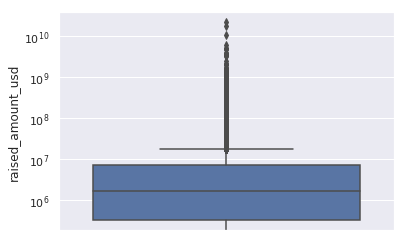

In [39]:
#visualising the diversity of data/values for 'raised_amount_usd' column
sns.boxplot(y=master_frame['raised_amount_usd'])
plt.yscale('log')
plt.show()

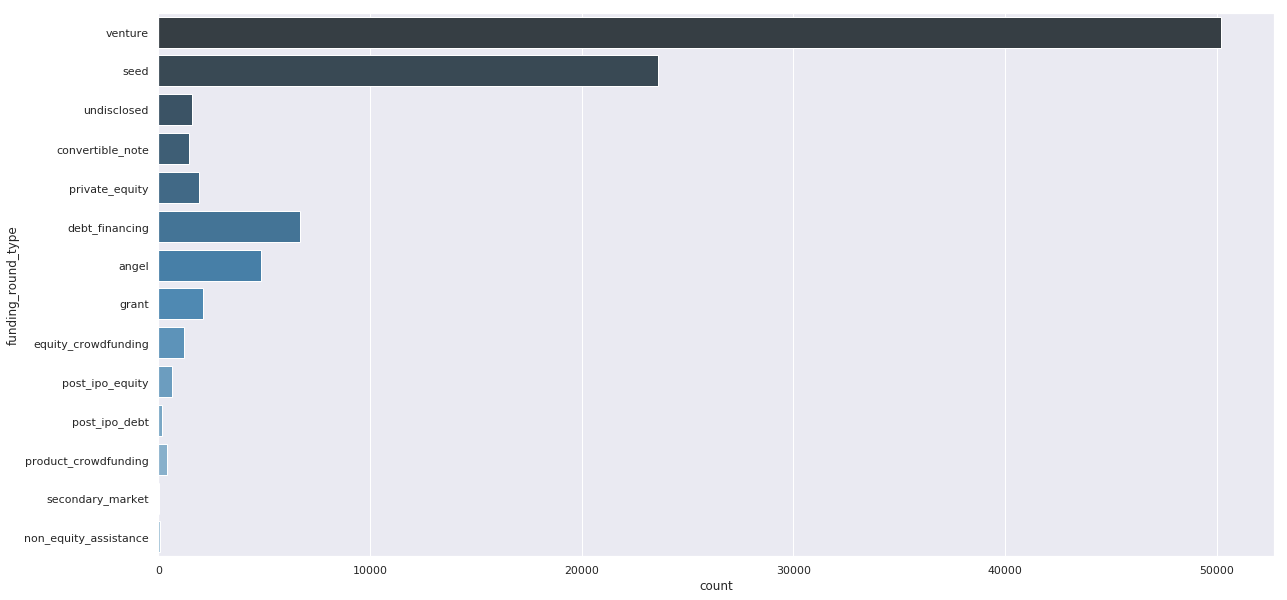

In [40]:
#plotting the total value of investment amounts for the respective funding types
"""
plt.figure(figsize=(25, 10))
db=master_frame['funding_round_type'].value_counts()
db.plot(kind='bar')
"""
plt.figure(figsize=(20, 10))
sns.countplot(y="funding_round_type", palette = "Blues_d", data=master_frame)
plt.show()

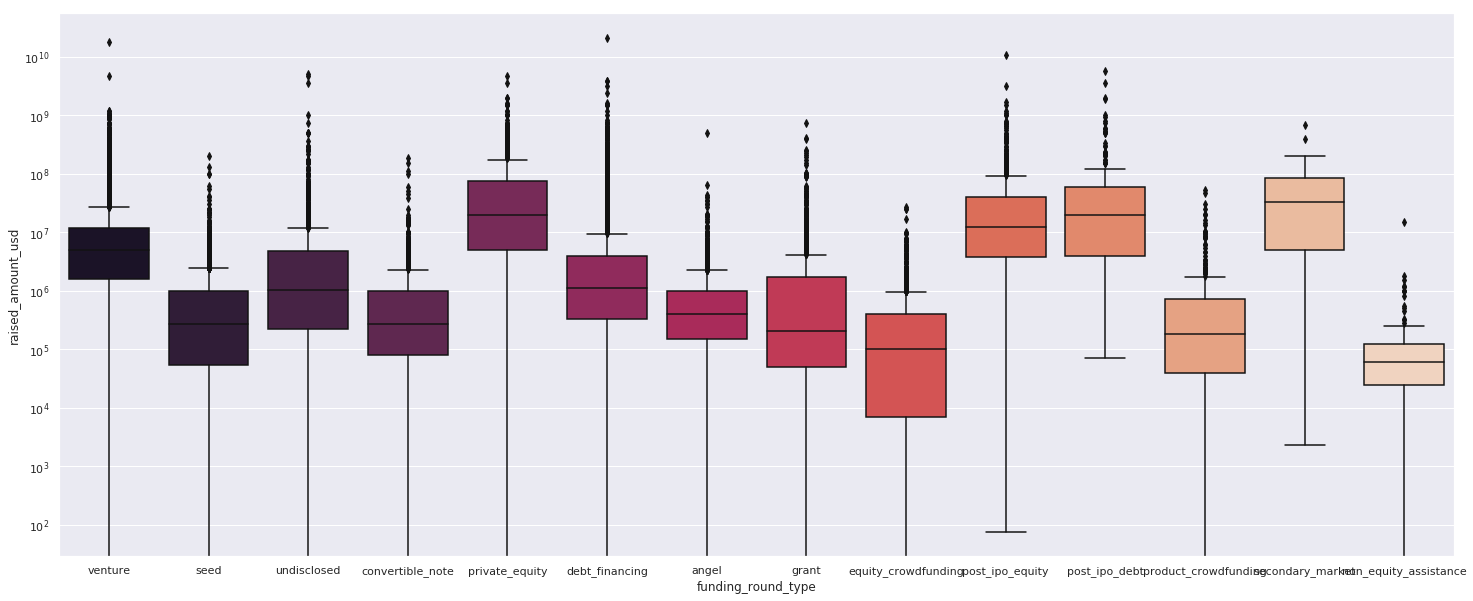

In [41]:
# boxplots showcasing the range of investment amounts across various funding categories
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', palette = "rocket", data=master_frame)
plt.yscale('log')
plt.show()

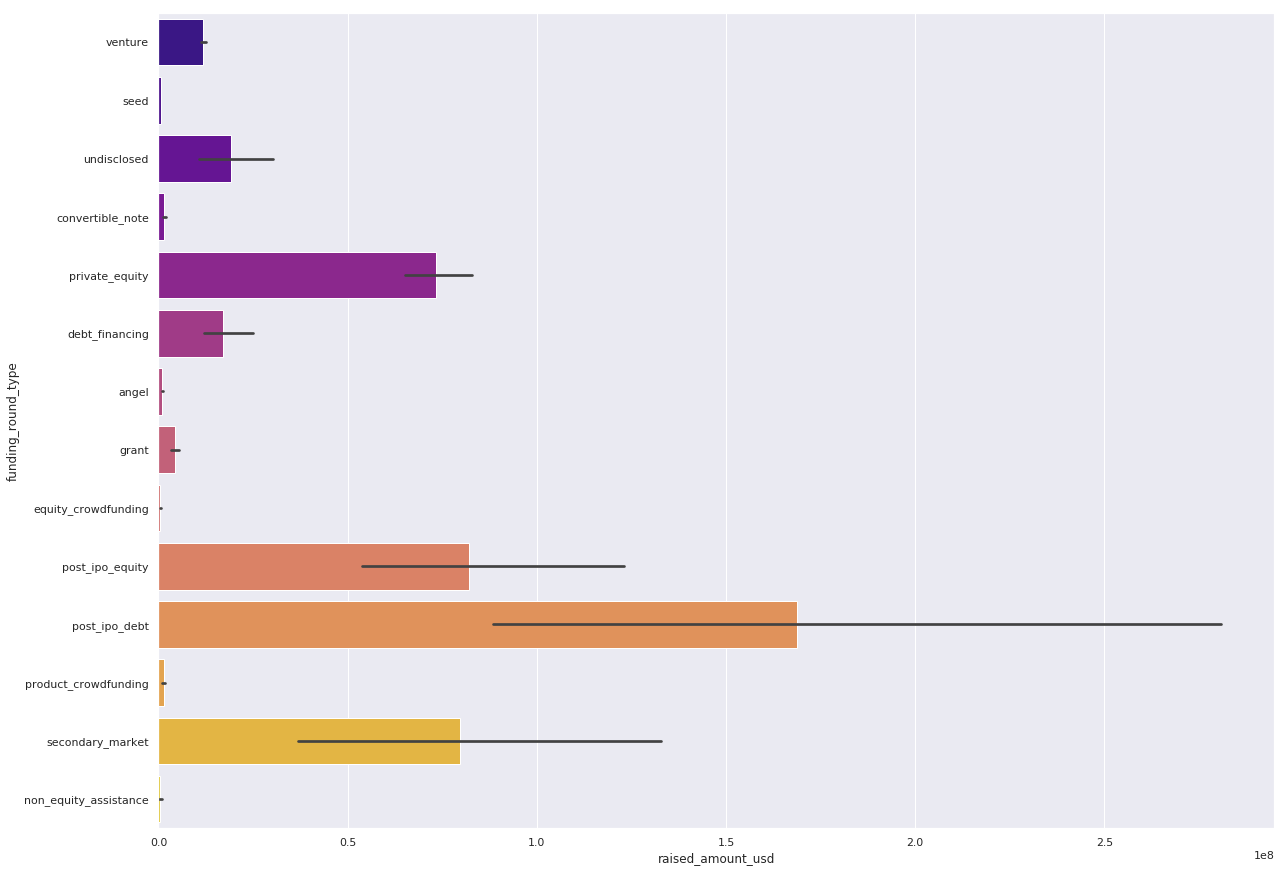

In [42]:
# bar plot with mean(raised_amount_usd) for different funding categories
plt.figure(figsize=(20, 15))
sns.barplot(y='funding_round_type', x='raised_amount_usd', palette = "plasma",data=master_frame)
plt.show()

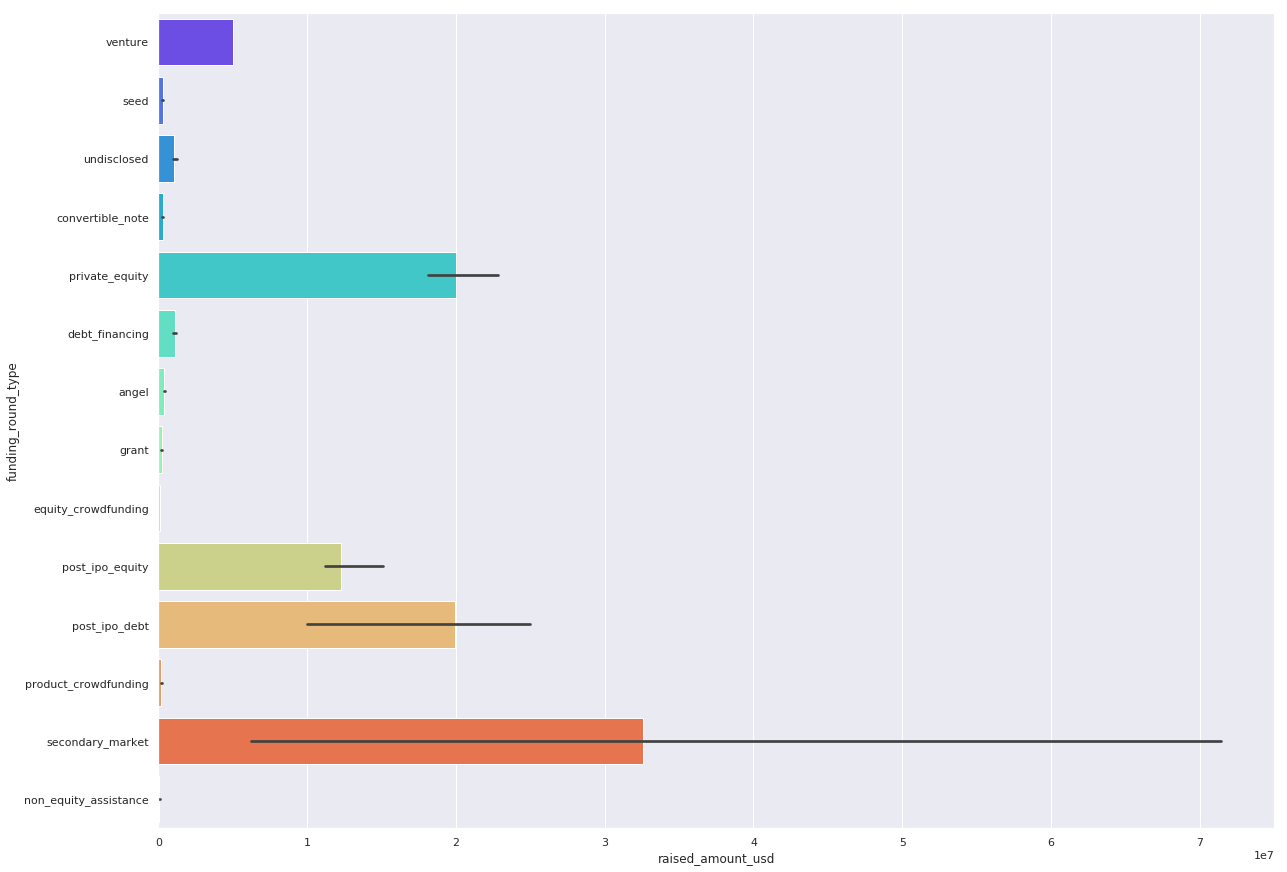

In [43]:
# bar plot with median(raised_amount_usd) for different funding categories
# Plotting categorical variable across the y-axis
plt.figure(figsize=(20, 15))
sns.barplot(x='raised_amount_usd', y="funding_round_type", palette = "rainbow",data=master_frame, estimator=np.median)
plt.show()

### Restricting the master frame to the 4 type of funding rounds that we need to actually focus on as per our objective.


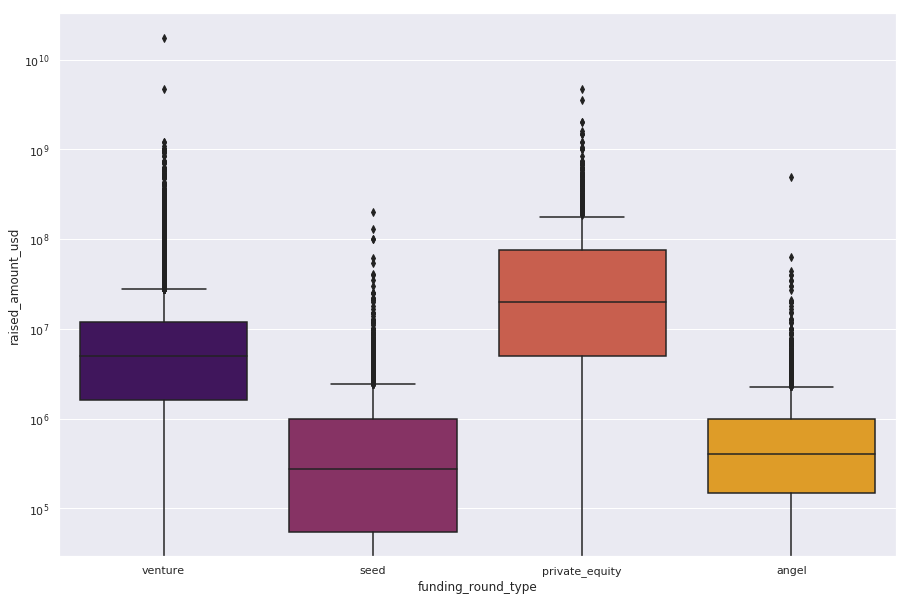

In [44]:

master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

# boxplot of raised_amount_usd across various funding categories
plt.figure(figsize=(15, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', palette = "inferno",data=master_frame)
plt.yscale('log')
plt.show()

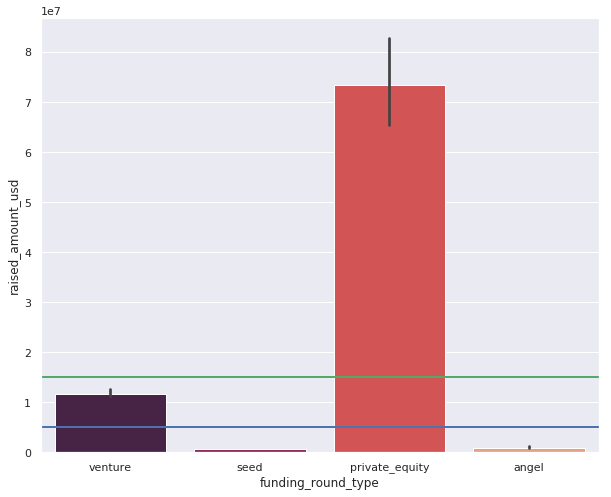

In [45]:
# bar plot with default statistic=mean
plt.figure(figsize=(10, 8))
sns.barplot(x='funding_round_type', y='raised_amount_usd', palette = "rocket", data=master_frame)

#plotting 5million and 15million marker-outlines as per the necessary benchmark which we need to focus on as per 
#our objective that Spark Funds wants to invest between 5 to 15 million USD per investment round

plt.axhline(y=5000000, linewidth=2, color = 'b')
plt.axhline(y=15000000, linewidth=2, color = 'g')
plt.show()

#### Now, let us narrow down our process and look at the mean and median values of investment amounts for these 4 funding categories

In [46]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
#averages.

funding_round_type
private_equity    7.334146e+07
venture           1.174943e+07
angel             9.588918e+05
seed              7.198925e+05
Name: raised_amount_usd, dtype: float64

In [47]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)
#medians

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               400000.0
seed                275000.0
Name: raised_amount_usd, dtype: float64

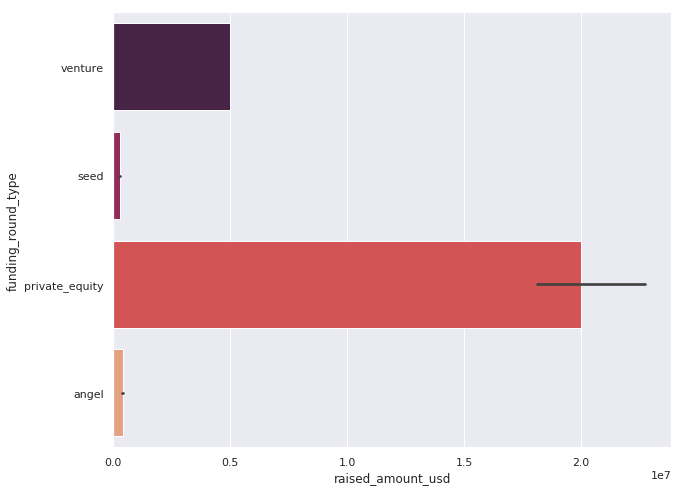

In [48]:
# Plotting median (raised_amount_usd) for the 4 different funding categories.
plt.figure(figsize=(10, 8))
sns.barplot(x='raised_amount_usd', y="funding_round_type", palette = "rocket",data=master_frame, estimator=np.median)
plt.show()

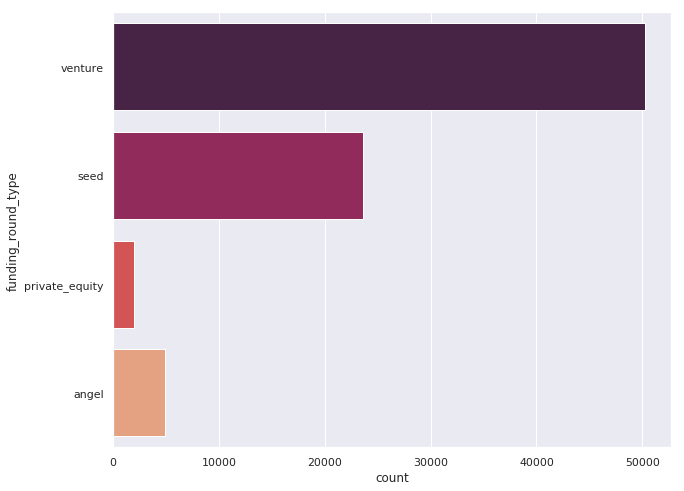

In [49]:
# Plotting total count of the 4 different funding categories across the dataframe
plt.figure(figsize=(10, 8))
sns.countplot(y="funding_round_type", palette = "rocket",data=master_frame)
plt.show()

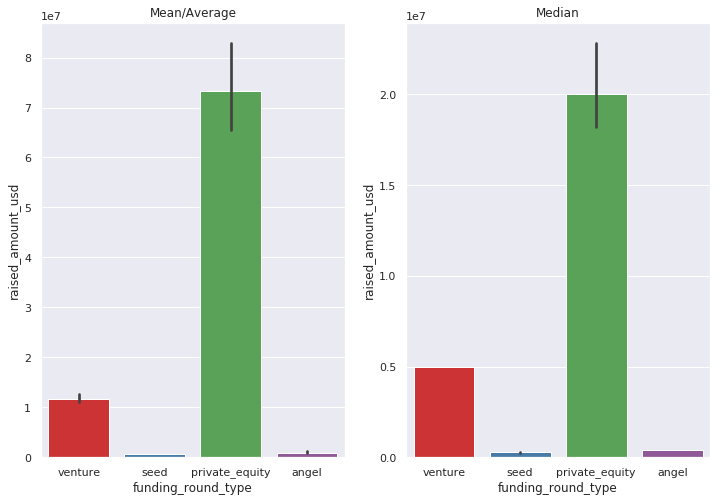

In [50]:
# Creating 2 subplots for mean and median respectively for further analysis

plt.figure(figsize=(12, 8))

# subplot 1: Plotting the mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', palette = "Set1", data=master_frame)
plt.title("Mean/Average")

# subplot 2: Plotting the median
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', palette = "Set1",data=master_frame, estimator=np.median)
plt.title("Median")

plt.show()

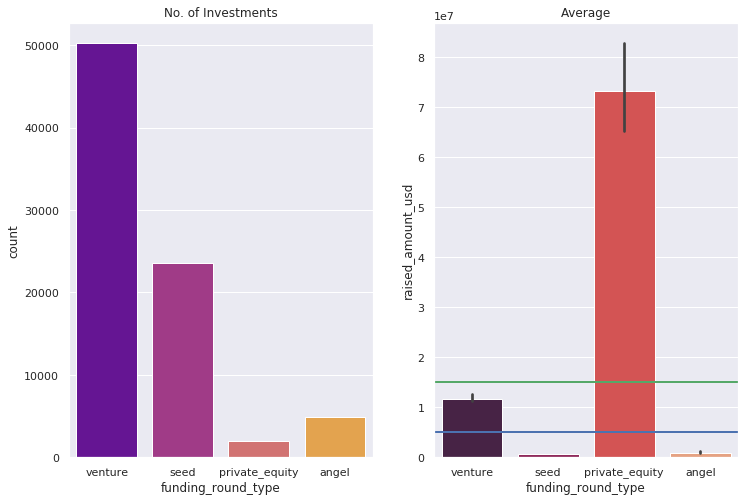

In [51]:
# Part of Checkpoint 6.  Plots:
# A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount
# of investment in each funding type. 

plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", palette = "plasma",data=master_frame)
plt.title("No. of Investments")

plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", palette = "rocket",data=master_frame, estimator=np.mean)
plt.title("Average")

plt.axhline(y=5000000, linewidth=2, color = 'b')
plt.axhline(y=15000000, linewidth=2, color = 'g')
plt.show()

### Thus, from the above plots, we can infer that:
 1. A large no. of them are investing in the *venture* funding category. 
 2. Additionally, it also comes in the bracket of 5-15million USD which Spark Funds have set up as their budget.
 
##### These 2 points help us come to the conclusion that 'venture' type funding is the best suited category for Spark Funds. 

# Checkpoint 3. Country Analysis

In [52]:
# Let's further go into granular aspects of our data to only include venture type
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]
master_frame.describe()

,raised_amount_usd
count,5.021900e+04
mean,1.174943e+07
std,8.635970e+07
min,0.000000e+00
25%,1.600886e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


In [53]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,N.A.
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA


In [54]:
master_frame['country_code'].describe()

count     50219
unique       98
top         USA
freq      36139
Name: country_code, dtype: object

### As per our next objective:
Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

In [55]:
#all the investment amounts values' for the different country codes in descending order.
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

country_code
USA     4.225108e+11
CHN     3.983542e+10
N.A.    2.545251e+10
GBR     2.024563e+10
IND     1.439186e+10
CAN     9.583332e+09
FRA     7.241142e+09
ISR     6.907515e+09
DEU     6.345560e+09
JPN     3.363677e+09
SWE     3.254953e+09
NLD     2.939404e+09
CHE     2.827560e+09
SGP     2.793918e+09
ESP     1.835831e+09
Name: raised_amount_usd, dtype: float64

In [56]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,N.A.
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA


### An important Observation:
#### Before we go ahead, let us clean the categories_list column data . First string before the vertical bar will be considered the primary sector. 
For example, consider the value - Apps|Games|Mobile in th category_list, output should be Apps.

In [57]:
# function to strip additional values and retian only the first value
def retain_value(value):
    values = value.split('|')
    if len(values) > 1:
        return values[0]
    else:
        return value

In [58]:
# lets test the function 
print(retain_value('Apps|Games|Mobile'))

Apps


In [59]:
print(retain_value('Games'))

Games


In [60]:
master_frame['primary_sector'] = master_frame['category_list'].apply(retain_value)
master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()

In [61]:
# Create a new data frame top9 with the list of countries with highest funding
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]

top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.241142e+09
ISR    6.907515e+09
DEU    6.345560e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

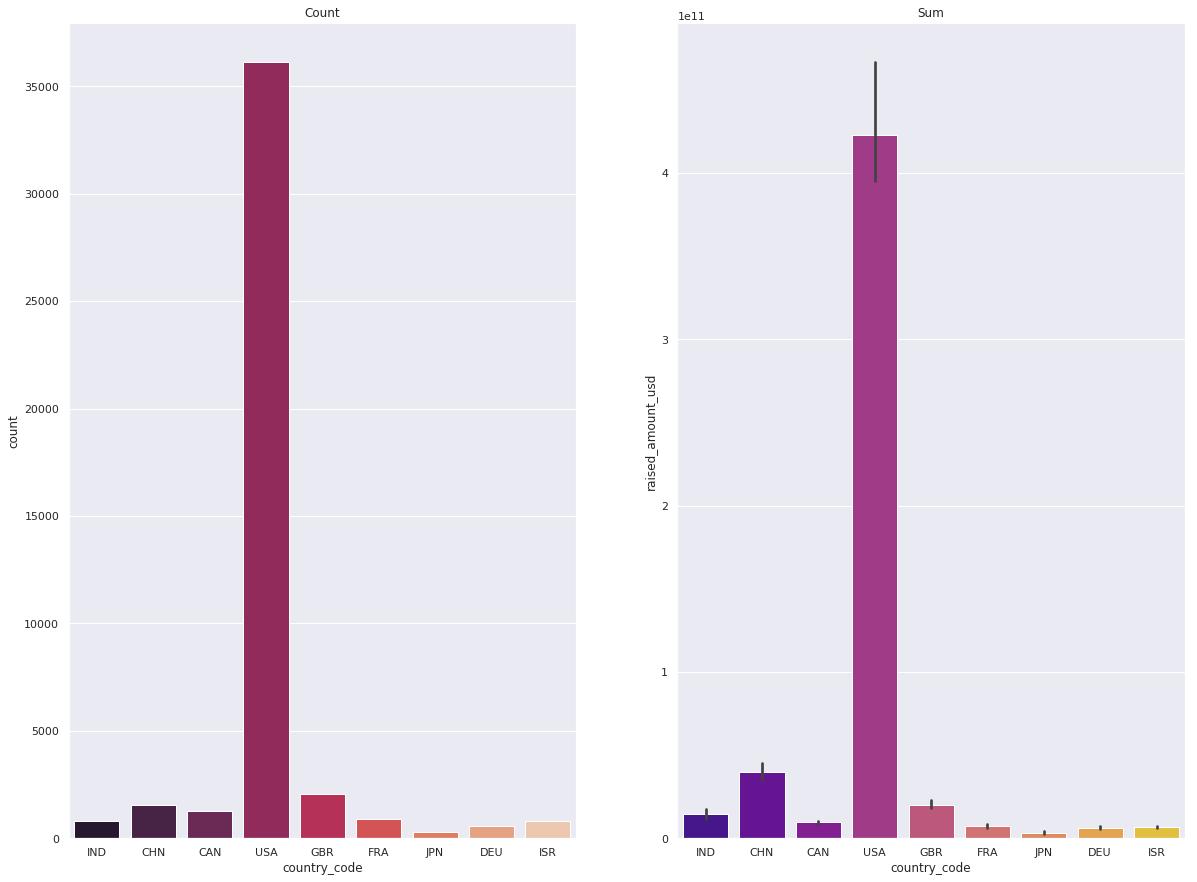

In [62]:
# Plotting the sum across the top 9 country_codes as a part of our objective mentioned below :

# Part of Checkpoint 6: Plots:
# A plot showing the top 9 countries against the total amount of investments of funding type FT.

plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code",palette = "rocket",data=top9)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd",palette = "plasma",data=top9, estimator=sum)
plt.title("Sum")
plt.show()

In [63]:
#using webscrapping for trying to generate relevant data from the given link.
#importing libraries
from bs4 import BeautifulSoup 
import requests 
URL = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"
r = requests.get(URL) 
soup = BeautifulSoup(r.content, 'html5lib') 
print(soup.prettify()) 

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of territorial entities where English is an official language - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_territorial_entities_where_English_is_an_official_language","wgTitle":"List of territorial entities where English is an official language","wgCurRevisionId":921620892,"wgRevisionId":921620892,"wgArticleId":750096,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","CS1 Dutch-language sources (nl)","All articles with dead external links","Articles with dead external links from September 2018","Articles with permanently dead external links","Webarchive template wayback links","Wikipedia articles needing clarification from June 2017",

The data seems to be unstructured, and it cannot be read in the form of the table. Moreover, it doesn't contain the Country Codes which can be used for mapping with the master_frame and generate insights as per our next objective.

### Our main objective: Identify the top three English-speaking countries in the data frame top9. 

##### The countries have been short listed by manual analysis of the list provided. (Wiki link: https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language)

### 1. USA  - United States of America
### 2. GBR - United Kingdom (The Great Britain)
### 3. IND - India

##### Plots showcasing the investment amounts for these Top 3 English speaking countries have been given below:

# Checkpoint 4. Sector Analysis 1 

In [64]:
# Let us now generate a new data frame with the data of only these 3 countries for furthur sector wise analysis
# which is our next objective.
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.225108e+11
GBR    2.024563e+10
IND    1.439186e+10
Name: raised_amount_usd, dtype: float64

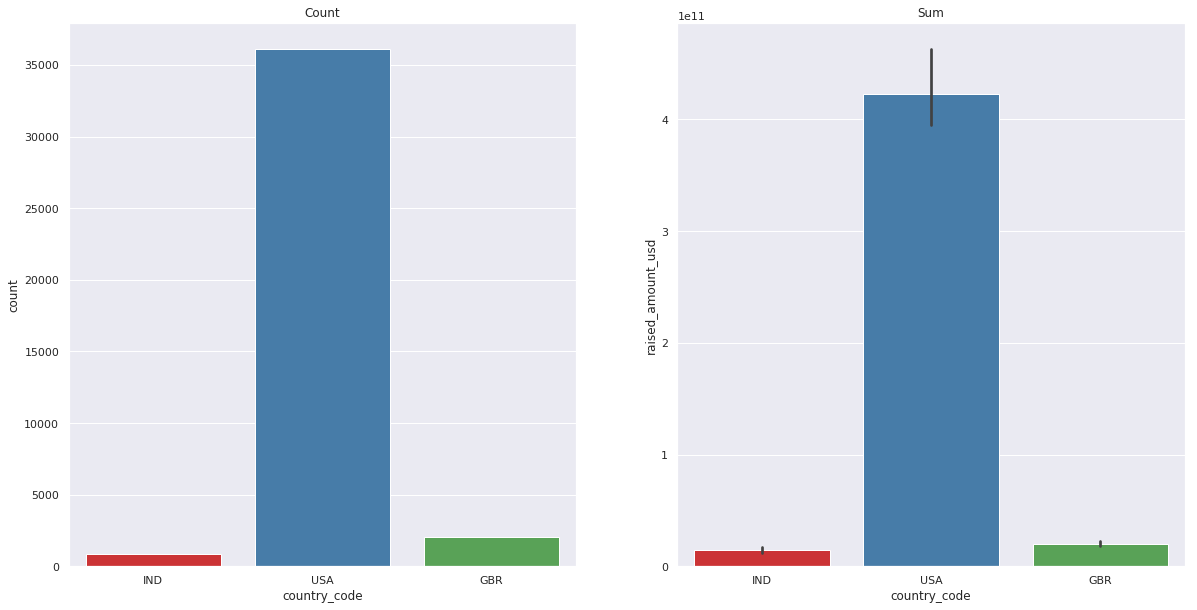

In [65]:
# Plotting the sum and the count across the Top 3 english official language country_code 
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", palette = "Set1", data=top3_english)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", palette = "Set1",data=top3_english, estimator=sum)
plt.title("Sum")
plt.show()

In [66]:
#Loading the mapping.csv file into a dataframe 
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [67]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


### Using mapping.info(), we observe that there are 7 main categories excluding Others and Blank data

In [68]:
# extracting values for main_sector from the category_list column and 
# generating a new 'variable' column with values of the main_sector
mapping = pd.melt(mapping,id_vars=["category_list"])
mapping = mapping[mapping.value != 0]
mapping.head(5)

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [69]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 8 to 6167
Data columns (total 3 columns):
category_list    687 non-null object
variable         688 non-null object
value            688 non-null int64
dtypes: int64(1), object(2)
memory usage: 21.5+ KB


In [70]:
# dropping values column as it isn't needed
# renaming variable and category_list columns as main_sector and primary_sector respectively. 

mapping = mapping.drop('value', axis=1)
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)

#converting all values for primary_sector column to lowercase
mapping['primary_sector'] = mapping['primary_sector'].str.lower()

In [71]:
len(top3_english)

39018

In [72]:
top3_english = pd.merge(top3_english, mapping, how='left', on='primary_sector', indicator=True)
top3_english.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,_merge
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,media,Entertainment,both
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging",both


In [73]:
#Checking whether we have have not added or removed any rows
len(top3_english)

39018

In [74]:
left_only = top3_english[top3_english['_merge'] != 'both']
left_only.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,_merge
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
12,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,/organization/100plus,100Plus,Analytics,acquired,USA,analytics,NaN,left_only
43,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,/organization/1world-online,1World Online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,analytics,NaN,left_only


In [75]:
# Determining the unique primary sector name
left_only.primary_sector.sort_values(ascending=True).unique()

array(['adaptive equipment', 'alternative medicine', 'analytics',
       'big data analytics', 'biotechnology and semiconductor',
       'business analytics', 'cannabis', 'career management',
       'cloud management', 'contact management',
       'digital rights management', 'digital signage',
       'document management', 'educational games', 'energy management',
       'event management', 'finance', 'finance technology',
       'financial exchanges', 'financial services', 'fleet management',
       'governance', 'greentech', 'identity management',
       'innovation management', 'intellectual asset management',
       'investment management', 'it management', 'journalism',
       'knowledge management', 'lead management', 'mobile analytics',
       'nanotechnology', 'natural gas uses',
       'natural language processing', 'navigation', 'personal finance',
       'personalization', 'product search', 'professional networking',
       'professional services', 'project management',
   

In [76]:
mapping.primary_sector.sort_values(ascending=True)

1847                 0notechnology
1848    0tural language processing
1849              0tural resources
4602                     0vigation
3441                            3d
3442                   3d printing
3443                 3d technology
5526                      a0lytics
5508                    accounting
2757              active lifestyle
5510                  ad targeting
3447            advanced materials
8                 adventure travel
5513                   advertising
5514         advertising exchanges
5515          advertising networks
5516         advertising platforms
4829                        advice
14                       aerospace
3455                   agriculture
1392         air pollution control
4833                    algorithms
4834                   all markets
4835                  all students
2772           alter0tive medicine
4837                        alumni
5527                       android
4840                        angels
2777                

### After visually examining the values, we can see that 'na' is misspelt as '0' . 
For e.g : analytics, alternative, management have been misselt as a0lytics, alter0tive, ma0gement etc.

In [77]:
# function to replace '0' with 'na'
import re
mapping['primary_sector'] = mapping.primary_sector.apply(lambda x: re.sub('[0]', 'na', str(x)))

In [78]:
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english = pd.merge(top3_english, mapping, how='left', on='primary_sector', indicator=True)
left_only = top3_english[top3_english['_merge'] != 'both']
left_only.primary_sector.sort_values(ascending=True).unique()

array(['adaptive equipment', 'biotechnology and semiconductor',
       'enterprise 2.0', 'greentech', 'natural gas uses',
       'product search', 'racing', 'rapidly expanding', 'retirement',
       'specialty retail', 'undefined'], dtype=object)

In [79]:
mapping.primary_sector.sort_values(ascending=True)

3441                                    3d
3442                           3d printing
3443                         3d technology
5508                            accounting
2757                      active lifestyle
5510                          ad targeting
3447                    advanced materials
8                         adventure travel
5513                           advertising
5514                 advertising exchanges
5515                  advertising networks
5516                 advertising platforms
4829                                advice
14                               aerospace
3455                           agriculture
1392                 air pollution control
4833                            algorithms
4834                           all markets
4835                          all students
2772                  alternative medicine
4837                                alumni
5526                             analytics
5527                               android
4840       

In [80]:
len(left_only)

230

In [81]:
# We shall ignore these values as we were not able to map them  
# since we did a left join, we can remove all rows that does not have 'both' indicator.
top3_english = top3_english[top3_english['_merge'] == 'both']
top3_english = top3_english.drop('_merge', axis=1)
top3_english.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,media,Entertainment
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging"


### Thus, from our findings we can conclude that The merged dataframe now hase two additional columns - 'primary_sector' and 'main_sector' as per our objective. 

# Checkpoint 5. Sector Analysis - 2

In [82]:
top3_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 39017
Data columns (total 11 columns):
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
permalink                  38788 non-null object
name                       38788 non-null object
category_list              38788 non-null object
status                     38788 non-null object
country_code               38788 non-null object
primary_sector             38788 non-null object
main_sector                38788 non-null object
dtypes: float64(1), object(10)
memory usage: 3.6+ MB


In [83]:
#dropping all rows whoes investment is not between 5 and 15 million USD (as per one of our requirements given in the constraints)
top3_english = top3_english.drop(top3_english[(top3_english.raised_amount_usd < 5000000)].index)
top3_english = top3_english.drop(top3_english[(top3_english.raised_amount_usd > 15000000)].index)


#creating 3 different dataframes for the top 3 English speaking countries
d1 = top3_english[top3_english['country_code'] == 'USA']
d2 = top3_english[top3_english['country_code'] == 'GBR']
d3 = top3_english[top3_english['country_code'] == 'IND']

In [84]:
len(d1)

12063

In [85]:
len(d2)

621

In [86]:
len(d3)

328

# USA - United States of America


In [87]:
#Total no. of investments
print("Total no. of Investments: ",d1['raised_amount_usd'].count())

#Total amount of investments
print("Total amount of Investments: ",d1['raised_amount_usd'].sum())

#Median and mean amount of investments
print("Median amount of Investments",d1['raised_amount_usd'].median())
print("Mean amount of Investments",d1['raised_amount_usd'].mean())

Total no. of Investments:  12063
Total amount of Investments:  107757097294.0
Median amount of Investments 8300000.0
Mean amount of Investments 8932860.589737212


In [88]:
d1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,167,1.454104e+09
Cleantech / Semiconductors,2350,2.163343e+10
Entertainment,591,5.099198e+09
Health,909,8.211859e+09
Manufacturing,799,7.258553e+09
"News, Search and Messaging",1583,1.397157e+10
Others,2950,2.632101e+10
"Social, Finance, Analytics, Advertising",2714,2.380738e+10


In [89]:
#Sorting the sector names (no. of investments wise) in descending order:
d1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [90]:
#Finding top 3 companies in terms of investment amount in the "Others" sector 
d1[d1['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/virtustream          64300000.0
/organization/capella              54968051.0
/organization/airtight-networks    54201907.0
Name: raised_amount_usd, dtype: float64

In [91]:
#Finding top 3 companies in terms of investment amount in the "Social,Finance,Analytics,Advertising" sector
d1[d1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/shotspotter    67933006.0
/organization/demandbase     63000000.0
/organization/intacct        61800000.0
Name: raised_amount_usd, dtype: float64

# GBR - United Kingdom (The Great Britain)


In [92]:
#Total no. of investments
print("Total no. of Investments: ",d2['raised_amount_usd'].count())

#Total amount of investments
print("Total amount of Investments: ",d2['raised_amount_usd'].sum())

#Median and mean amount of investments
print("Median amount of Investments",d2['raised_amount_usd'].median())
print("Mean amount of Investments",d2['raised_amount_usd'].mean())

Total no. of Investments:  621
Total amount of Investments:  5379078691.0
Median amount of Investments 8000000.0
Mean amount of Investments 8661962.465378422


In [93]:

d2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,16,1.670516e+08
Cleantech / Semiconductors,130,1.163990e+09
Entertainment,56,4.827847e+08
Health,24,2.145375e+08
Manufacturing,42,3.619403e+08
"News, Search and Messaging",73,6.157462e+08
Others,147,1.283624e+09
"Social, Finance, Analytics, Advertising",133,1.089404e+09


In [94]:
#Sorting the sector names (no. of investments wise) in descending order:
d2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [95]:
#Finding top 3 companies in terms of investment amount in the "Others" sector 
d2[d2['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/electric-cloud    37000000.0
/organization/sensage           36250000.0
/organization/enigmatic         32500000.0
Name: raised_amount_usd, dtype: float64

In [96]:
#Finding top 3 companies in terms of investment amount in the "Social,Finance,Analytics,Advertising" sector
d2[d2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/zopa                     32900000.0
Name: raised_amount_usd, dtype: float64

# IND - India

In [97]:
#Total no. of investments
print("Total no. of Investments: ",d3['raised_amount_usd'].count())

#Total amount of investments
print("Total amount of Investments: ",d3['raised_amount_usd'].sum())

#Median and mean amount of investments
print("Median amount of Investments",d3['raised_amount_usd'].median())
print("Mean amount of Investments",d3['raised_amount_usd'].mean())

Total no. of Investments:  328
Total amount of Investments:  2949543602.0
Median amount of Investments 8700000.0
Mean amount of Investments 8992510.981707318


In [98]:

d3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,13,1.369000e+08
Cleantech / Semiconductors,20,1.653800e+08
Entertainment,33,2.808300e+08
Health,19,1.677400e+08
Manufacturing,21,2.009000e+08
"News, Search and Messaging",52,4.338345e+08
Others,110,1.013410e+09
"Social, Finance, Analytics, Advertising",60,5.505496e+08


In [99]:
#Sorting the sector names (no. of investments wise) in descending order:
d3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [100]:
#Finding top 3 companies in terms of investment amount in the "Others" sector 
d3[d3['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/firstcry-com    39000000.0
/organization/myntra          38000000.0
/organization/commonfloor     32900000.0
Name: raised_amount_usd, dtype: float64

In [101]:
#Finding top 3 companies in terms of investment amount in the "Social,Finance,Analytics,Advertising" sector
d3[d3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/manthan-systems    50700000.0
/organization/komli-media        28000000.0
/organization/shopclues-com      25000000.0
Name: raised_amount_usd, dtype: float64

# 6. Plots

## 1. USA - United States of America

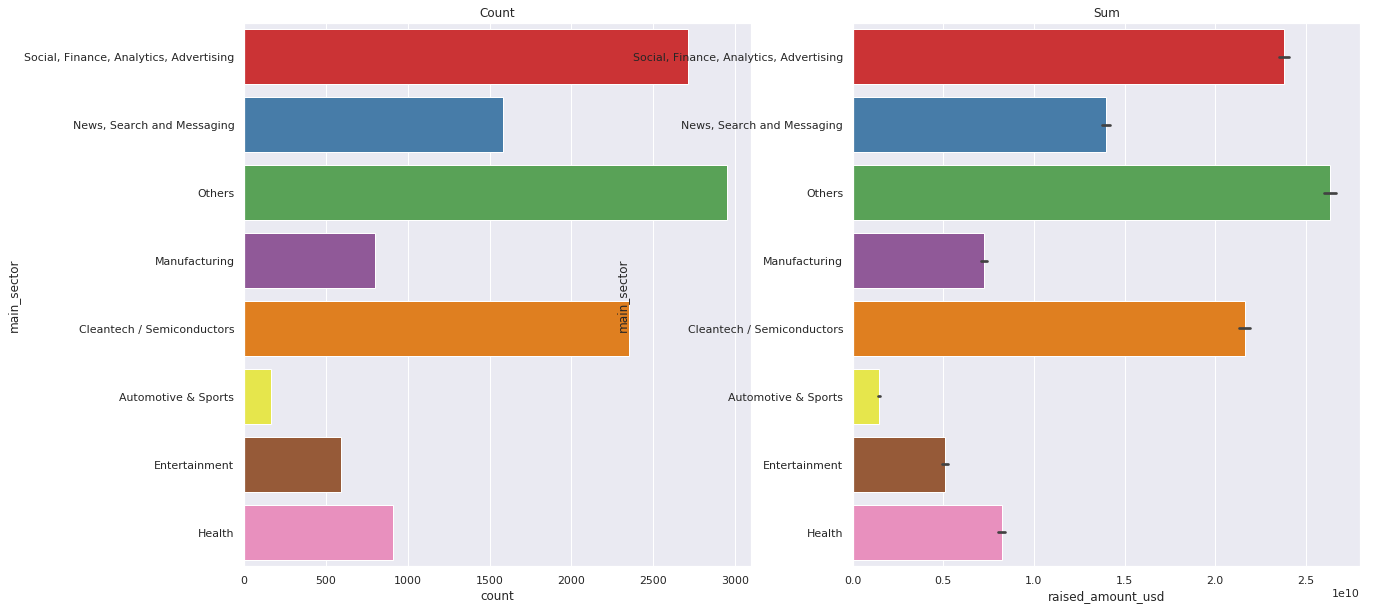

In [102]:
#bar plots showcasing the total count/sum of the investments for all the 8 sectors in USA.
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", palette = "Set1",data=d1)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", palette = "Set1",data=d1, estimator=sum)
plt.title("Sum")
plt.show()

## 2. GBR - United Kingdom (The Great Britain)

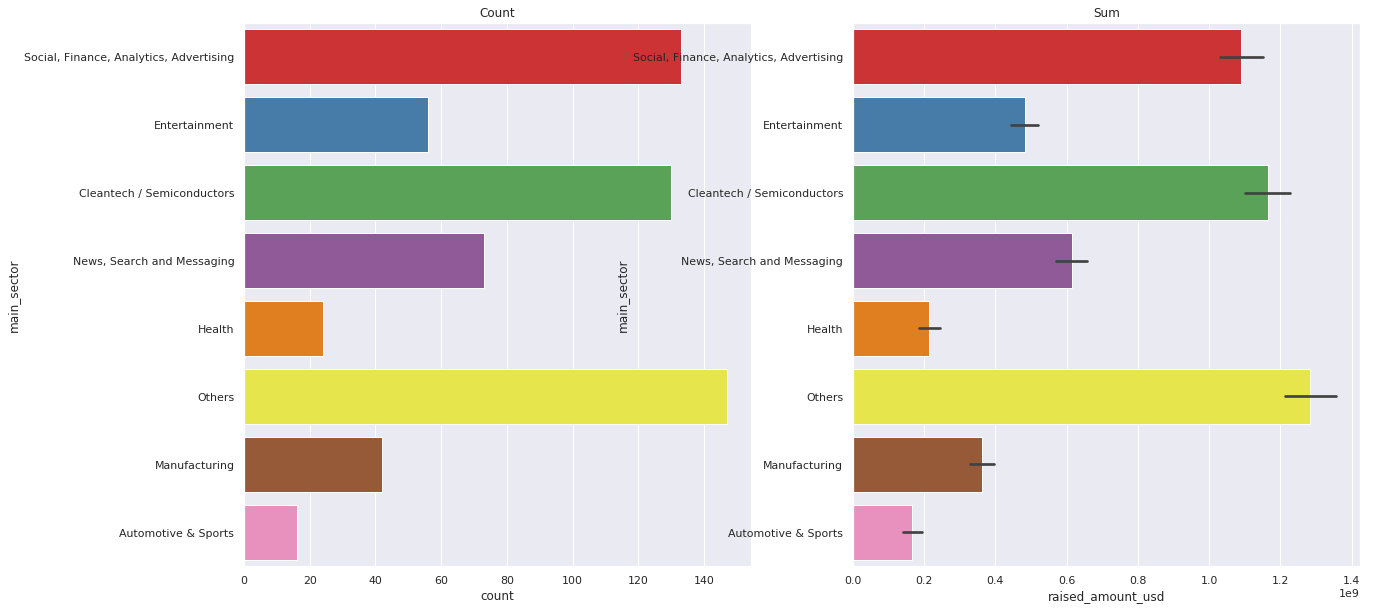

In [103]:
#bar plots showcasing the total count/sum of the investments for all the 8 sectors in GR (United Kingdom (The Great Britain))
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", palette = "Set1",data=d2)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd",  palette = "Set1",data=d2, estimator=sum)
plt.title("Sum")
plt.show()

## 3. IND -  India

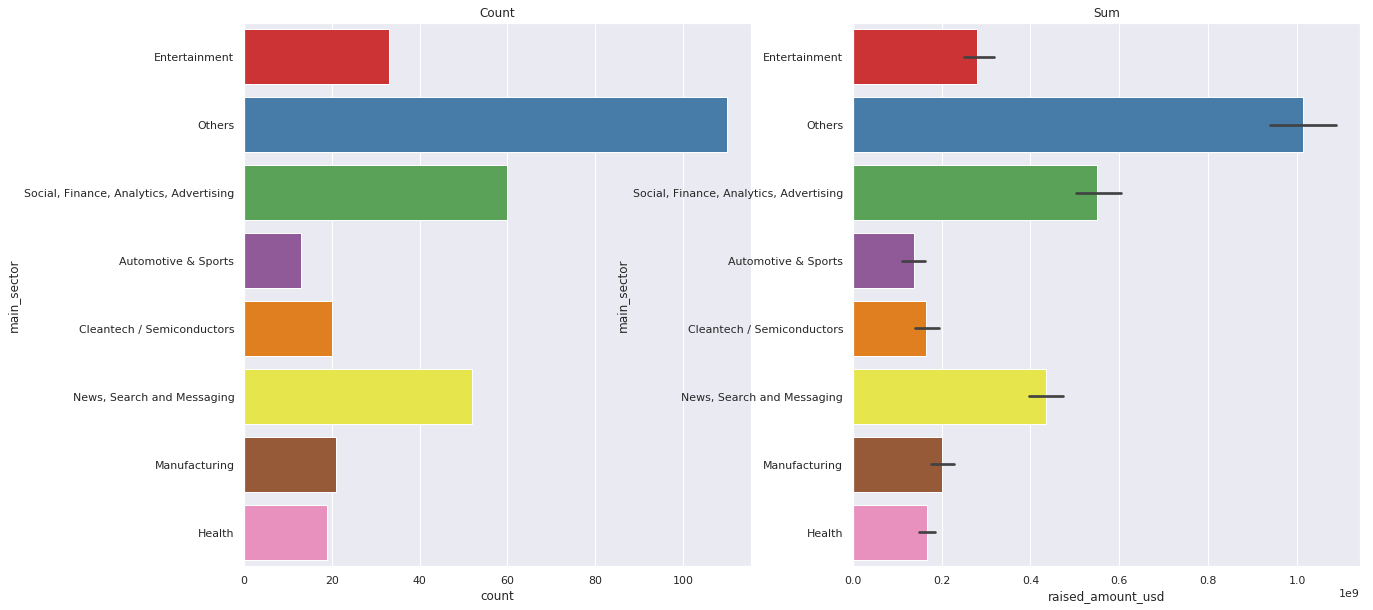

In [104]:
#bar plots showcasing the total count/sum of the investments for all the 8 sectors in IND-India.
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector",  palette = "Set1",data=d3)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd",  palette = "Set1", data=d3, estimator=sum)
plt.title("Sum")
plt.show()

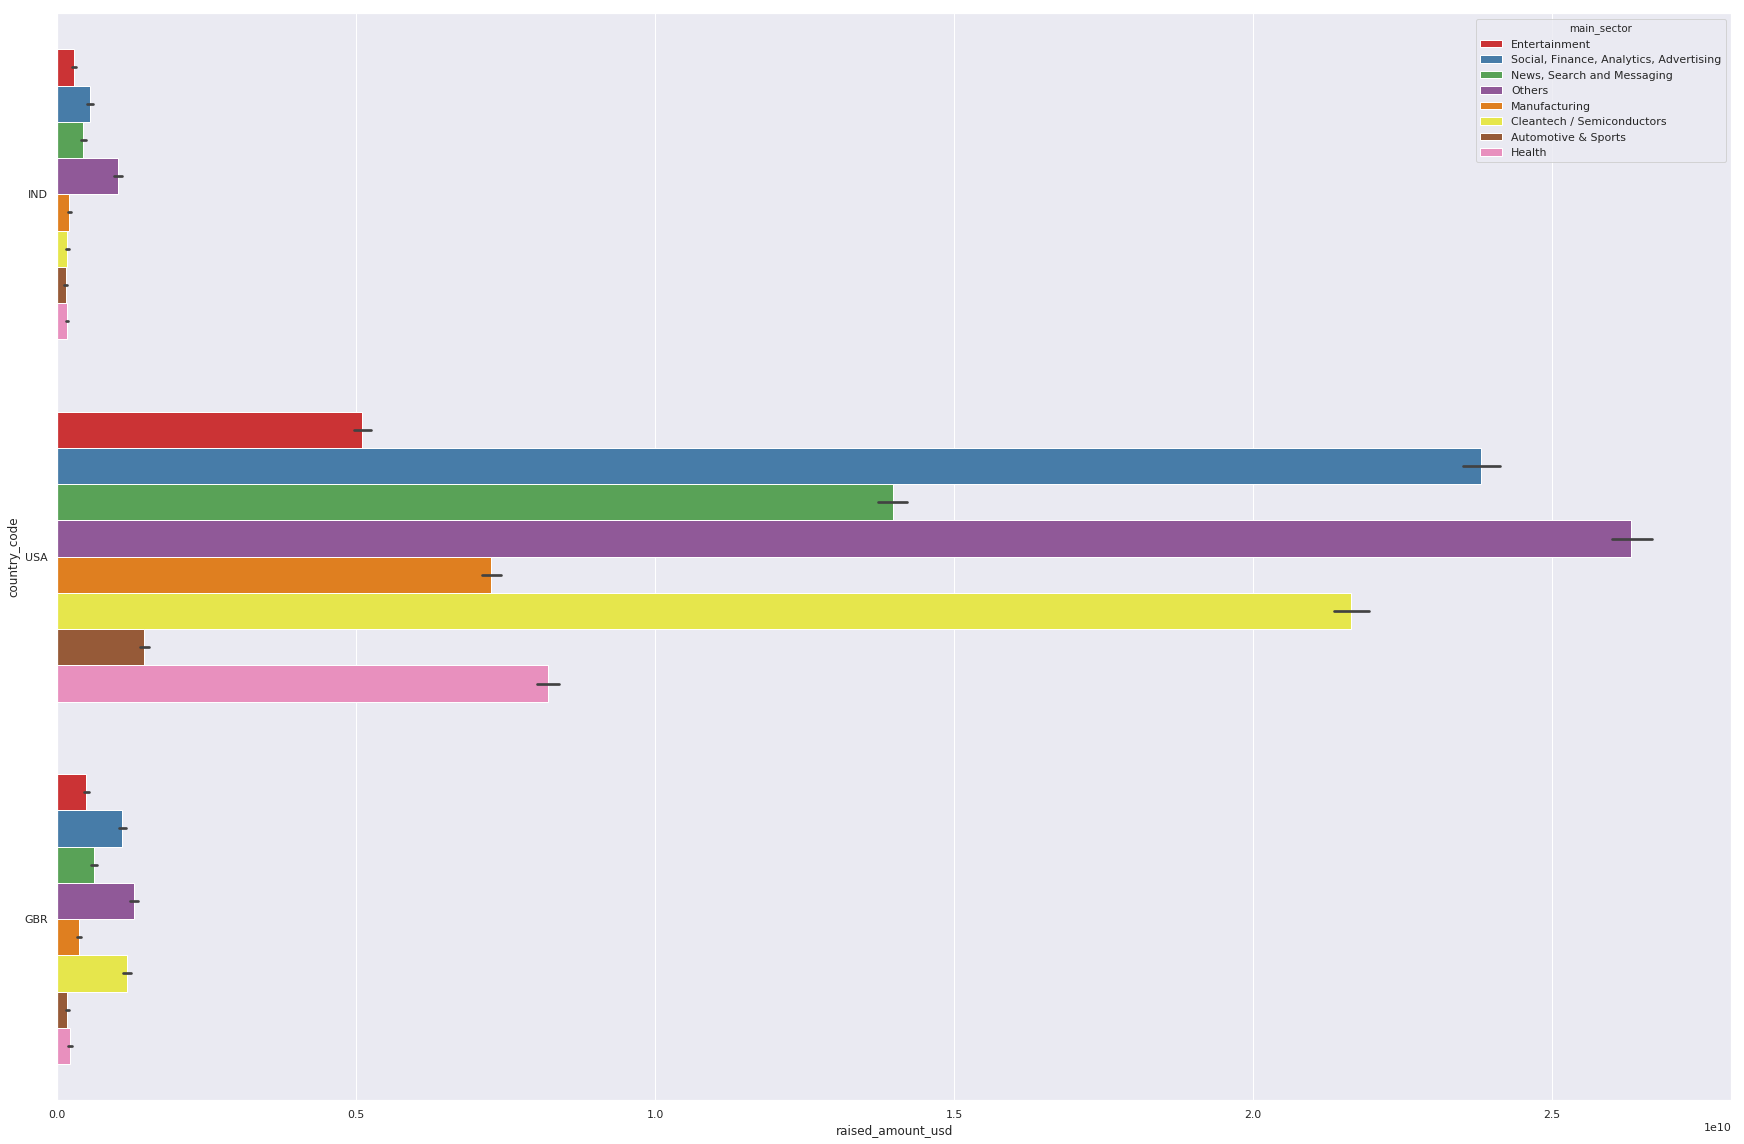

In [105]:
#plot showcasing the sum of the investments for all the 8 sectors in the top 3 English speaking countries.
plt.figure(figsize=(30, 20))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector",  palette = "Set1", data=top3_english, estimator=np.sum)
plt.show()

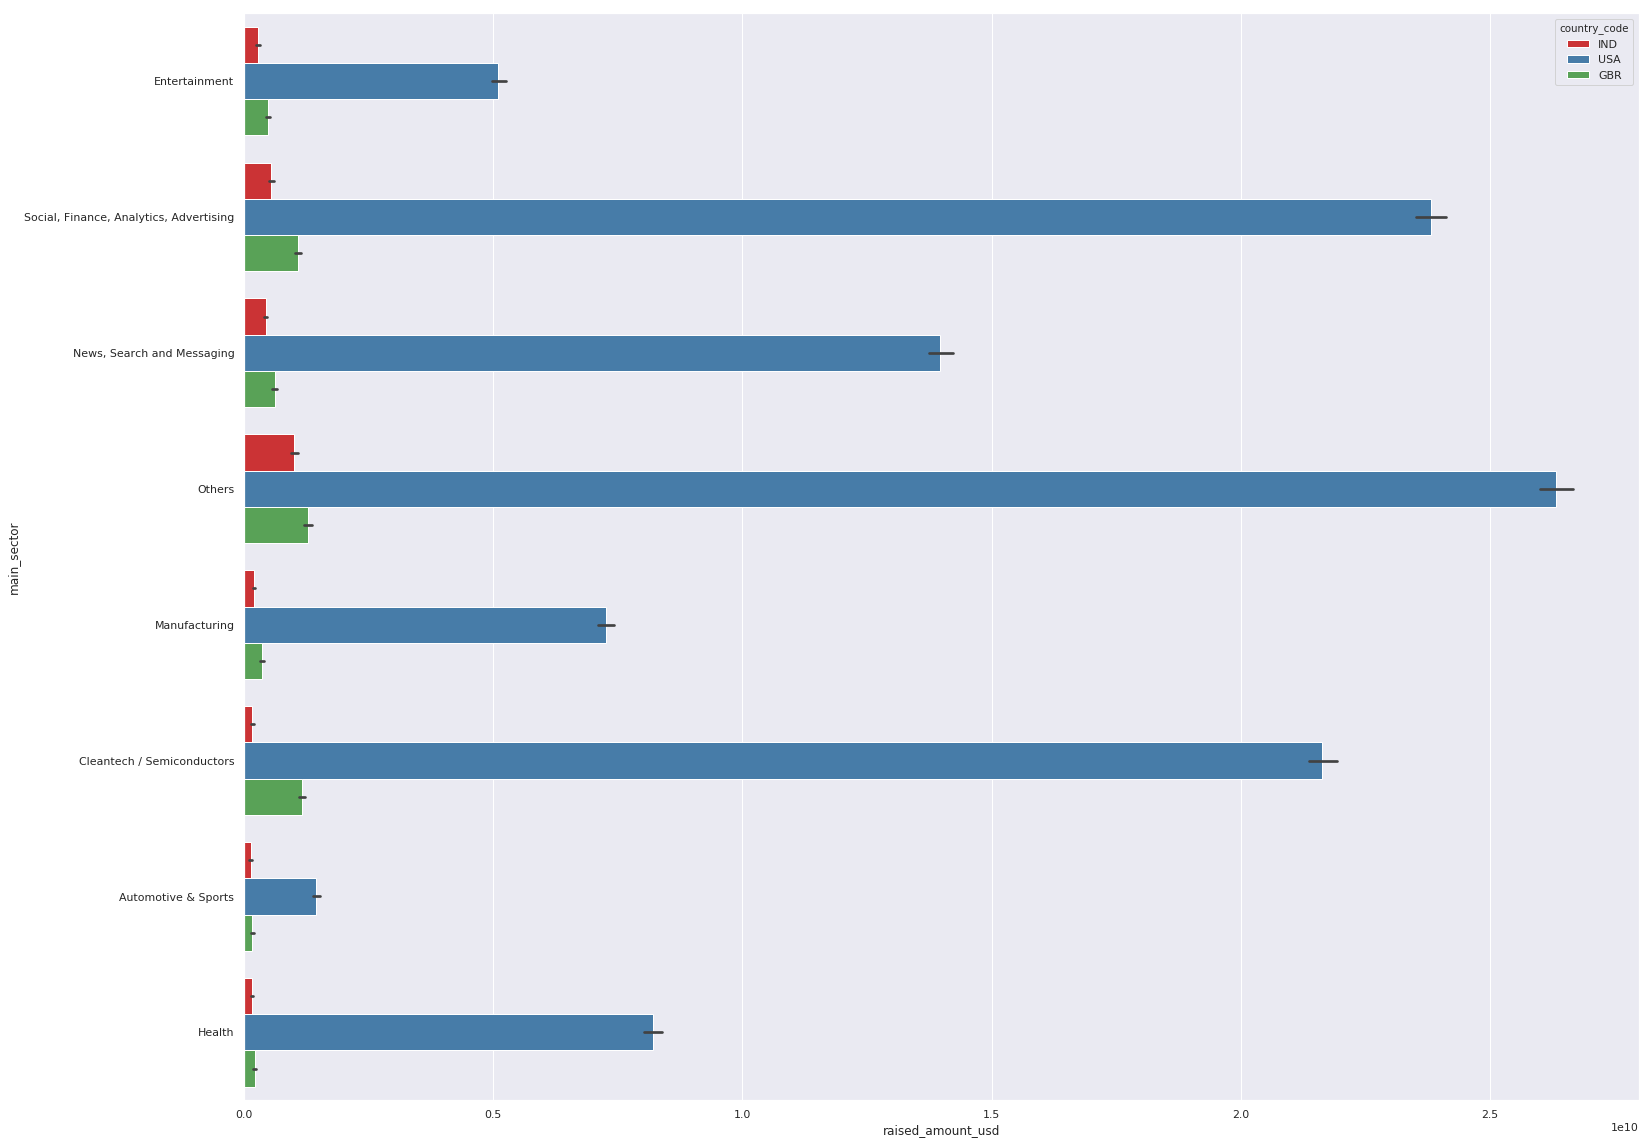

In [106]:
#another plot showcasing the sum of the investments for all the 8 sectors in the top 3 English speaking countries.
plt.figure(figsize=(25, 20))
sns.barplot(y='main_sector', x='raised_amount_usd', hue="country_code",  palette = "Set1",data=top3_english, estimator=np.sum)
plt.show()

In [107]:
d1 = d1[d1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
d1

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
17,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/organization/128-technology,128 Technology,Service Providers|Technology,operating,USA,service providers,Others
29,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14000000.0,/organization/170-systems,170 Systems,Software,acquired,USA,software,Others
31,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5000000.0,/organization/17zuoye,17zuoye,Education|Language Learning,operating,USA,education,Others
32,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,10000000.0,/organization/17zuoye,17zuoye,Education|Language Learning,operating,USA,education,Others
36,/funding-round/3d2463c9b97f32b3be8747fbd629961f,venture,11-02-2010,5000000.0,/organization/1bog,One Block Off the Grid (1BOG),Clean Technology|Residential Solar,closed,USA,clean technology,Cleantech / Semiconductors
41,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,24-01-2014,15000000.0,/organization/1stdibs,1stdibs,E-Commerce,operating,USA,e-commerce,Others
57,/funding-round/bdf9f5bf67ee51155eae223acac57ec5,venture,17-11-2013,5050000.0,/organization/21e6,21 Inc,Big Data|Bitcoin|Hardware + Software|Technology,operating,USA,big data,"Social, Finance, Analytics, Advertising"
58,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,18-09-2014,10000000.0,/organization/22nd-century-group,22nd Century Group,Biotechnology,ipo,USA,biotechnology,Cleantech / Semiconductors
63,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,07-01-2011,9000000.0,/organization/23andme,23andMe,Biotechnology|Search,operating,USA,biotechnology,Cleantech / Semiconductors


In [108]:
d2 = d2[d2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]
d2

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
108,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,android,"Social, Finance, Analytics, Advertising"
307,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,18-05-2015,8259067.0,/organization/abcodia,Abcodia,Biotechnology,operating,GBR,biotechnology,Cleantech / Semiconductors
383,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,31-03-2011,10000000.0,/organization/acacia-pharma,Acacia Pharma,Biotechnology,operating,GBR,biotechnology,Cleantech / Semiconductors
395,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,15-06-2011,9910333.0,/organization/acal-energy,ACAL Energy,Clean Technology,operating,GBR,clean technology,Cleantech / Semiconductors
398,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,03-06-2014,10720178.0,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,Information Technology,operating,GBR,information technology,"Social, Finance, Analytics, Advertising"
623,/funding-round/064999587157b0ceae7843204a105d6d,venture,28-09-2015,13359377.0,/organization/acs-clothing,ACS Clothing,E-Commerce,operating,GBR,e-commerce,Others
624,/funding-round/875b4295af2381558cec9d97f86fe3e4,venture,02-03-2014,12879637.0,/organization/acs-clothing,ACS Clothing,E-Commerce,operating,GBR,e-commerce,Others
843,/funding-round/71f1b5903874817292d67e1ac6aa66b2,venture,11-03-2014,7500000.0,/organization/adbrain,Adbrain,Advertising|Enterprise Software|Marketing Auto...,operating,GBR,advertising,"Social, Finance, Analytics, Advertising"
921,/funding-round/5bcca548aeccd5acdea0d0edb086db8d,venture,07-05-2014,6772812.0,/organization/adinsight,ResponseTap,Advertising|Enterprise Software|SaaS,operating,GBR,advertising,"Social, Finance, Analytics, Advertising"
927,/funding-round/83653befbf3c473ec97a1617479448c8,venture,01-03-2008,6500000.0,/organization/adjug,Adjug,Advertising|Internet|Marketplaces|Publishing,acquired,GBR,advertising,"Social, Finance, Analytics, Advertising"


In [109]:
d3 = d3[d3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]
d3

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
55,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,/organization/21diamonds-india,21Diamonds,E-Commerce,operating,IND,e-commerce,Others
278,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,/organization/a-little-world,A LITTLE WORLD,Finance,operating,IND,finance,"Social, Finance, Analytics, Advertising"
1269,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,/organization/agile,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,finance,"Social, Finance, Analytics, Advertising"
1529,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,01-07-2014,5000000.0,/organization/akosha,Akosha,Consumer Internet|Digital Media|Enterprise Sof...,operating,IND,consumer internet,"Social, Finance, Analytics, Advertising"
1924,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,17-06-2013,5500000.0,/organization/amagi-media-labs,Amagi Media Labs,Advertising,operating,IND,advertising,"Social, Finance, Analytics, Advertising"
2028,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,03-07-2015,5000000.0,/organization/ameyo,Ameyo,Software,operating,IND,software,Others
2240,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,26-03-2014,5000000.0,/organization/annapurna-microfinace,Annapurna Microfinace,Finance,operating,IND,finance,"Social, Finance, Analytics, Advertising"
2396,/funding-round/43f871c060118fcdf5316b3bf0797618,venture,01-12-2007,15000000.0,/organization/apnaloan,ApnaPaisa,Credit|Finance|Marketplaces,operating,IND,credit,"Social, Finance, Analytics, Advertising"
2507,/funding-round/29152fc812013ef482c93f6dd47f58ff,venture,29-06-2006,10000000.0,/organization/applabs,AppLabs,Software,acquired,IND,software,Others
2611,/funding-round/4979e1bb00ddc452753682273fd4466c,venture,10-04-2014,5000000.0,/organization/appsdaily-solutions,Appsdaily Solutions,Software,operating,IND,software,Others


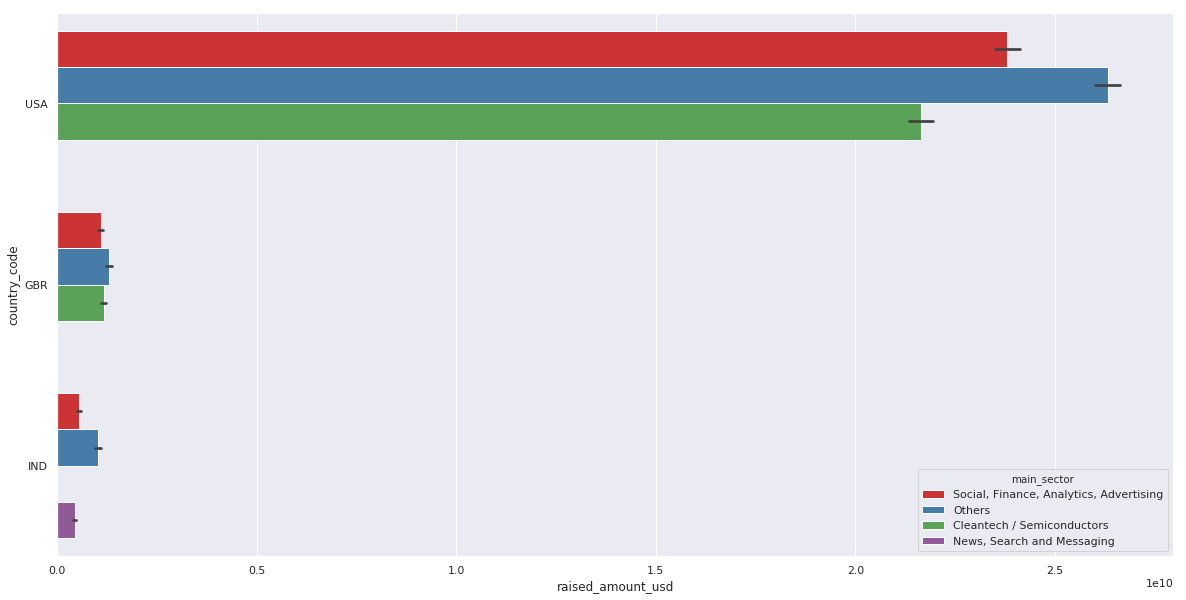

In [110]:
#Part of checkpoint 6: Plots  
#plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
#(for the chosen investment type FT).

frames = [d1, d2, d3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector",  palette = "Set1", data=result, estimator=np.sum)
plt.show()

# End of Assignment. 

## Compiled by: Prateek Ralhan 

*************************************************************************************************************************